# Single Variable Linear Regression

imports

In [1]:
# import
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

CSV file loads

In [2]:
base_path = os.path.abspath(os.curdir)

ex1_path = f"{base_path}\\ex1data1.txt"
ex1_df = pd.read_csv(ex1_path, sep=',', header=None)


Scatter plot of first data file 

Text(0.5, 1.0, 'Food truck income over population')

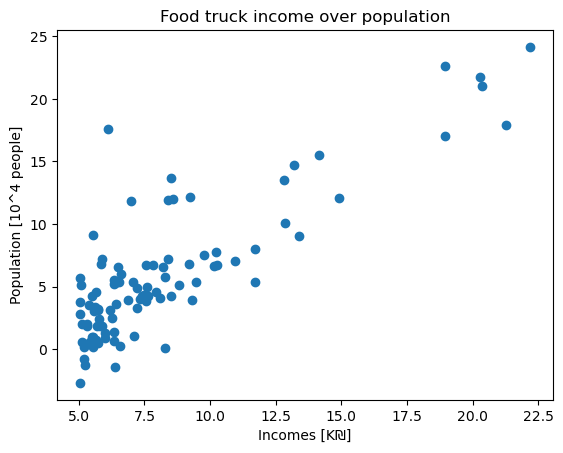

In [3]:
#create a scatter plot of tip vs total_bill
x = ex1_df[0]
y = ex1_df[1]
plt.scatter(x, y)

# add labels to the plot
plt.xlabel("Incomes [K₪]")
plt.ylabel("Population [10^4 people]")
plt.title("Food truck income over population")

GD_EX1 test

c:\Users\galsa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\galsa\AppData\Local\Temp\ipykernel_14616\2775727657.py:44: RuntimeWarning: overflow encountered in square
  cost = (np.sum((np.transpose(h)-y)**2))/(_2m)


KeyboardInterrupt: 

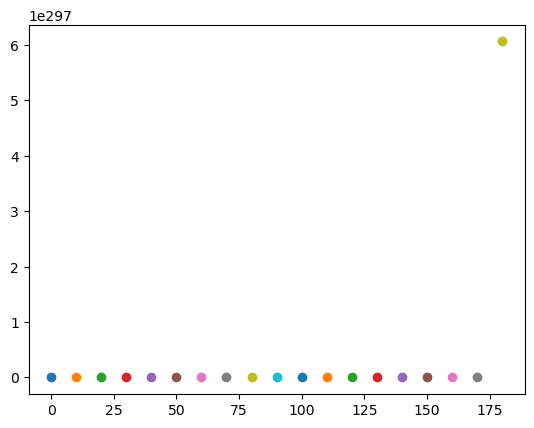

In [8]:
weights = [[1, 2]]
try:
    new_weights = Utils.GD_EX1(weights=weights,dataset=ex1_df)
    print(new_weights)
except Exception as e:
    print(e)

# Utility Section 

In [7]:
# Utility class for HW_2 
class Utils(): 

    __X = None
    __EPSILON = 1e-3 

    def GD_EX1(weights, 
               dataset, 
               alpha:float=0.1,
               max_iters:int=1e6, 
               plot_cost_iterations:bool=False,
               plot_resolution:int=10):
        """
        TODO: documentation
        ekncjdnvjkd
        """

        err_msg = f'Failed to converge with max iters: {max_iters}'
        last_cost = Utils.calc_cost(weights, dataset)
        new_cost = 0.0
        iter = 0

        while not Utils.__check_convergence(last_cost, new_cost):
            if iter == max_iters: raise Exception(err_msg)
            if plot_cost_iterations and iter % plot_resolution == 0: 
                plot_cost = last_cost if iter == 0 else new_cost
                plt.scatter(iter, plot_cost)

            weights = Utils.calc_GD_new_weights(weights, dataset, alpha)
            last_cost = new_cost if iter > 0 else last_cost
            new_cost = Utils.calc_cost(weights, dataset)
            iter+=1

        if plot_cost_iterations:
            plt.xlabel("Iterations")
            plt.ylabel("J(Θ)")
            plt.title("J(Θ) over number of iterations graph")
        return new_weights
    
    def calc_cost(weights, dataset):
        x = Utils.__get_x_vals(dataset)
        h = np.dot(weights, np.transpose(x))
        y = np.array(dataset.iloc[:, -1])
        _2m = 2*len(y)
        cost = (np.sum((np.transpose(h)-y)**2))/(_2m)
        return float(cost)
    
    def calc_GD_new_weights(weights, dataset, alpha:float):
        x = Utils.__get_x_vals(dataset)
        x_t = np.transpose(x)
        y = np.array(dataset.iloc[:, -1])
        m = len(y)
        n = len(weights[0])
        for i in range(0, n):
            h = np.dot(weights, x_t)
            h_sub_y = [h-np.transpose(y)] 
            weights[0][i] = weights[0][i] - np.sum(x_t[i]*h_sub_y)*(alpha/m)
        return weights

    def __check_convergence(last_cost:float, new_cost:float):
        ascending = new_cost > last_cost
        step_change = np.abs(last_cost-new_cost)
        is_converge = (not ascending) and (step_change < Utils.__EPSILON)
        return is_converge
    
    def __get_x_vals(dataset):
        if Utils.__X is None:
            x = dataset.iloc[:,:-1]
            ones = np.ones((x.shape[0], 1)) 
            Utils.__X = np.concatenate((ones, x), axis=1)
        return Utils.__X
